In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"evriliyasyahutami","key":"304b19e33d3c1fe20bf4465b01154e46"}'}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d nurcholisart/daftar-harga-pangan-daerah-istimewa-yogyakarta

  0% 0.00/763 [00:00<?, ?B/s]
100% 763/763 [00:00<00:00, 1.87MB/s]


In [5]:
!mkdir daftar-harga-pangan-daerah-istimewa-yogyakarta
!unzip daftar-harga-pangan-daerah-istimewa-yogyakarta.zip -d daftar-harga-pangan-daerah-istimewa-yogyakarta
!ls daftar-harga-pangan-daerah-istimewa-yogyakarta

Archive:  daftar-harga-pangan-daerah-istimewa-yogyakarta.zip
  inflating: daftar-harga-pangan-daerah-istimewa-yogyakarta/daftar-harga-pangan-diy.csv  
daftar-harga-pangan-diy.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('daftar-harga-pangan-daerah-istimewa-yogyakarta/daftar-harga-pangan-diy.csv')

In [10]:
df.head()

,Tanggal,Pasar,Bawang Merah,Beras Medium,Beras Termurah,Cabe Merah Besar,Cabe Merah Keriting,Daging Ayam,Daging Sapi,Gula Pasir,Jagung,Kedelai,Minyak Goreng,Telur Ayam
0,11/5/2012,Pasar Beringharjo,8000,7500,6800,14000,12000,24000,80000,12000,4156,9100,8000,15000
1,11/12/2012,Pasar Beringharjo,8000,7500,6100,10000,9000,23000,80000,12000,4156,9100,8000,14500
2,11/19/2012,Pasar Beringharjo,11000,7500,6100,11000,10000,23000,80000,12000,4156,9100,8000,14500
3,11/26/2012,Pasar Beringharjo,12000,7500,6100,8000,6000,22000,88000,12000,4156,9100,8000,15000
4,12/3/2012,Pasar Beringharjo,12000,7700,6300,10000,8000,23000,88000,12000,4156,9100,8000,15000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tanggal              24 non-null     object
 1   Pasar                24 non-null     object
 2   Bawang Merah         24 non-null     int64 
 3   Beras Medium         24 non-null     int64 
 4   Beras Termurah       24 non-null     int64 
 5   Cabe Merah Besar     24 non-null     int64 
 6   Cabe Merah Keriting  24 non-null     int64 
 7   Daging Ayam          24 non-null     int64 
 8   Daging Sapi          24 non-null     int64 
 9   Gula Pasir           24 non-null     int64 
 10  Jagung               24 non-null     int64 
 11  Kedelai              24 non-null     int64 
 12  Minyak Goreng        24 non-null     int64 
 13  Telur Ayam           24 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 2.8+ KB


<Axes: >

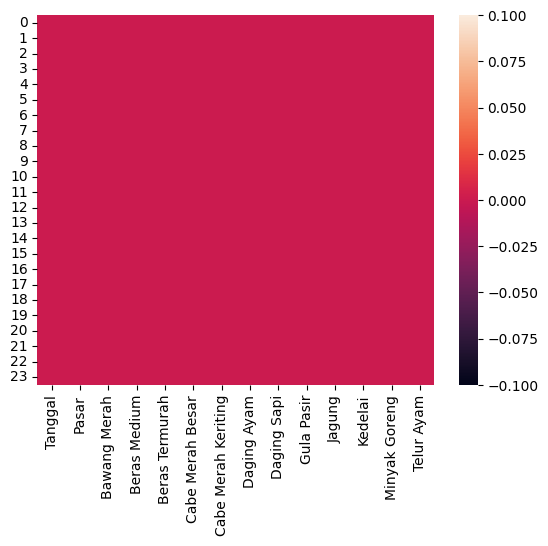

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.describe()

,Bawang Merah,Beras Medium,Beras Termurah,Cabe Merah Besar,Cabe Merah Keriting,Daging Ayam,Daging Sapi,Gula Pasir,Jagung,Kedelai,Minyak Goreng,Telur Ayam
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,16565.208333,8181.833333,6786.958333,15695.666667,12521.75000,26652.166667,94090.916667,11069.583333,4156.166667,9100.000000,9760.875000,16135.875000
std,5911.125009,495.752714,492.821820,8121.012909,6170.54409,2853.048647,8091.375392,1220.276088,504.733048,208.514414,1214.670874,2138.996439
min,8000.000000,7500.000000,6100.000000,8000.000000,5000.00000,22000.000000,80000.000000,10000.000000,4000.000000,8600.000000,8000.000000,9761.000000
25%,12750.000000,7950.000000,6500.000000,10000.000000,8000.00000,24000.000000,88000.000000,10000.000000,4000.000000,9000.000000,8000.000000,15000.000000
50%,15500.000000,8091.000000,6900.000000,11500.000000,9500.00000,26326.000000,98000.000000,11285.000000,4000.000000,9050.000000,10500.000000,16000.000000
75%,20000.000000,8525.000000,7000.000000,19250.000000,18000.00000,28250.000000,98000.000000,12000.000000,4156.000000,9100.000000,10500.000000,18000.000000
max,37000.000000,9500.000000,8500.000000,40000.000000,24000.00000,32000.000000,116000.000000,15000.000000,6500.000000,9500.000000,11000.000000,19000.000000


<ipython-input-14-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

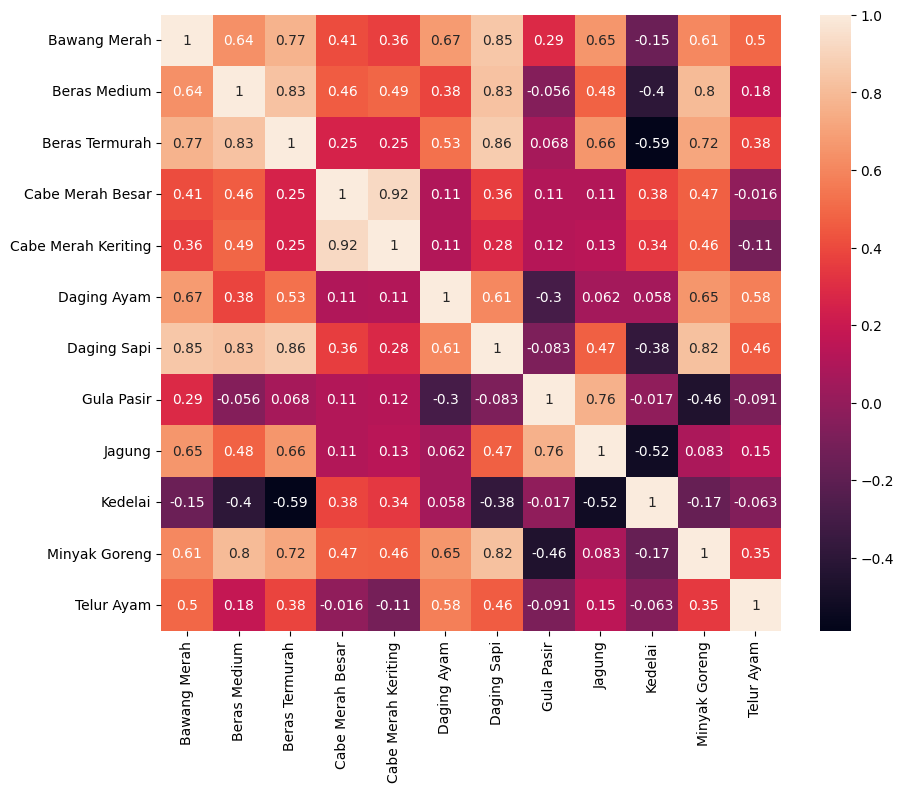

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [15]:
cabe_merah_keriting = df.groupby('Cabe Merah Keriting').count()[['Bawang Merah']].sort_values(by='Bawang Merah', ascending=True).reset_index()
cabe_merah_keriting = cabe_merah_keriting.rename(columns={'Bawang Merah': 'numberOfCars'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '5000'),
  Text(1, 0, '6000'),
  Text(2, 0, '7000'),
  Text(3, 0, '8000'),
  Text(4, 0, '9000'),
  Text(5, 0, '10000'),
  Text(6, 0, '12000'),
  Text(7, 0, '12522'),
  Text(8, 0, '15000'),
  Text(9, 0, '16000'),
  Text(10, 0, '18000'),
  Text(11, 0, '20000'),
  Text(12, 0, '22000'),
  Text(13, 0, '24000')])

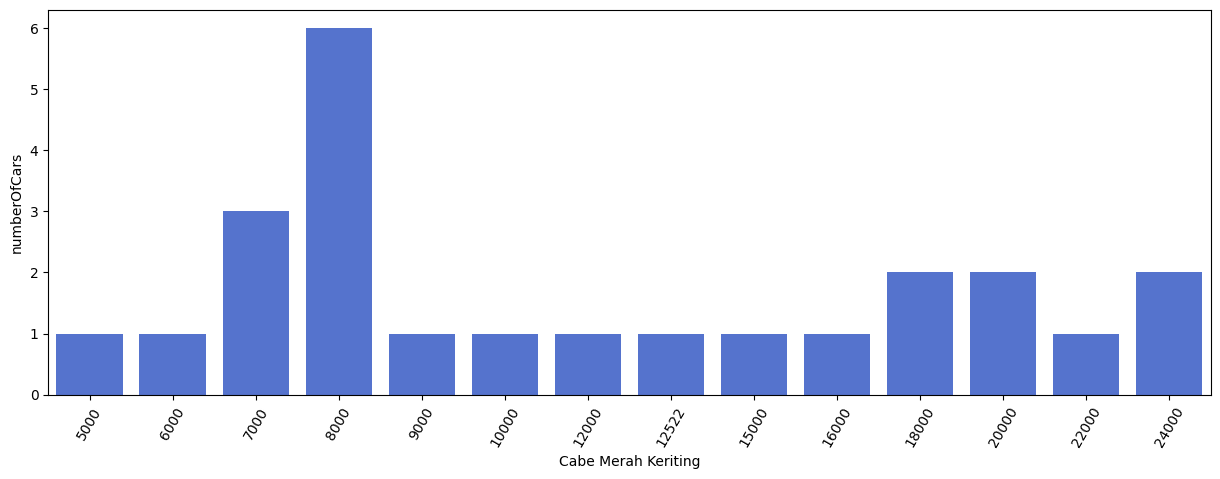

In [17]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=cabe_merah_keriting['Cabe Merah Keriting'], y=cabe_merah_keriting['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [18]:
beras_termurah = df.groupby('Beras Termurah').count()[['Cabe Merah Besar']].sort_values(by='Cabe Merah Besar').reset_index()
beras_termurah = beras_termurah.rename(columns={'Cabe Merah Besar':'count'})

<Axes: xlabel='Beras Termurah', ylabel='count'>

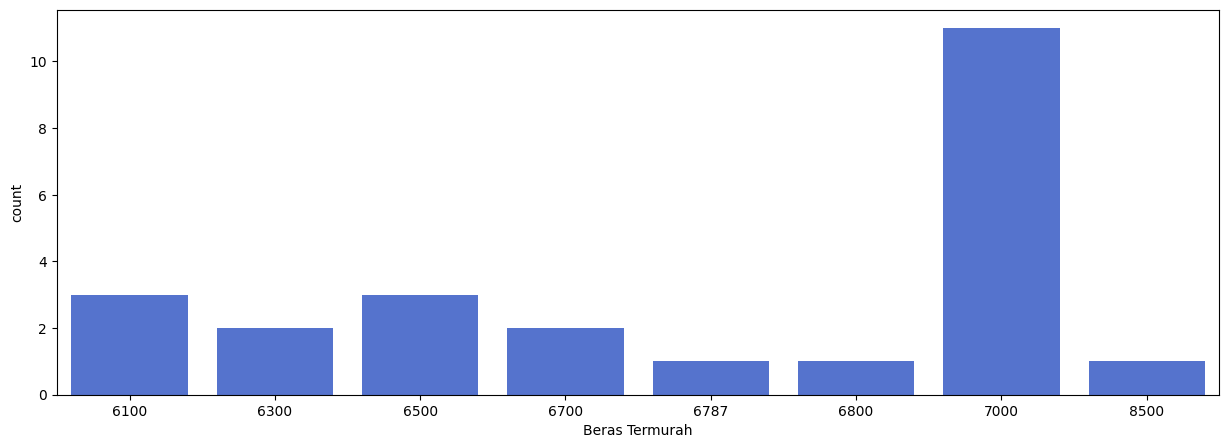

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=beras_termurah['Beras Termurah'], y=beras_termurah['count'], color='royalblue')

<Figure size 1000x500 with 0 Axes>

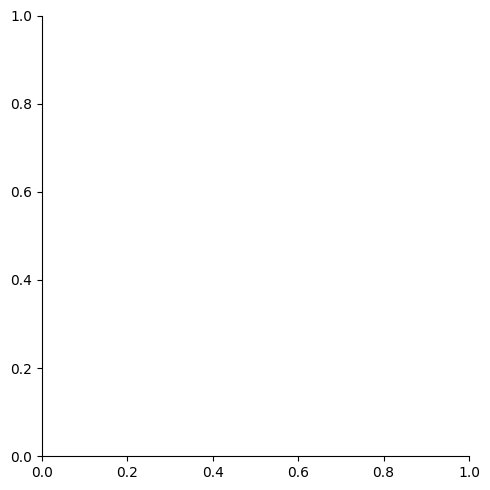

In [20]:
plt.figure(figsize=(10, 5))
sns.displot(df='Cabe Merah Keriting')

<Figure size 1000x500 with 0 Axes>

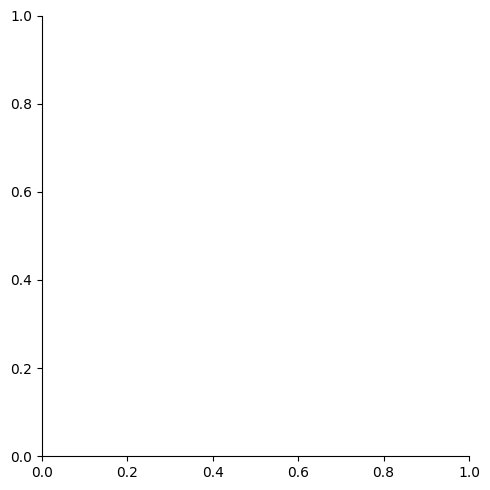

In [21]:
plt.figure(figsize=(10, 5))
sns.displot(df='Beras Medium')

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
features = ['Beras Termurah','Bawang Merah','Telur Ayam', 'Cabe Merah Keriting', 'Daging Ayam', 'Daging Sapi', 'Gula Pasir', 'Cabe Merah Besar', 'Jagung', 'Kedelai', 'Minyak Goreng']
x = df[features]
y = df['Beras Medium']
x.shape, y.shape

((24, 11), (24,))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(6,)

In [25]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [26]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.7884450185324221


In [27]:
input_data = np.array([[8000,7500,6800,14000,12000,24000,80000,12000,4156,9100,8000]])
prediction = lr.predict(input_data)

print('Estimasi harga pangan dalam EUR :', prediction)

Estimasi harga pangan dalam EUR : [-109692.05528576]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
import pickle

filename = 'estimasi_pangan.sav'
pickle.dump(lr,open(filename,'wb'))